In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
dataset = pd.read_csv('Diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0
768,2,120,80,29,0,28.5,0.314,40,1


In [3]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Information about the dataset
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   
768            2      120             80             29        0  28.5   
769            3      100             90             25      120  30.0   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,3.841558,120.866234,69.146753,20.553247,79.748052,31.985455,0.471247,33.251948,0.349351
std,3.365987,31.939907,19.349244,15.935187,115.139126,7.875233,0.331156,11.747624,0.477075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.575000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,770.0,3.841558,3.365987,0.000,1.00000,3.0000,6.0000,17.00
Glucose,770.0,120.866234,31.939907,0.000,99.00000,117.0000,140.0000,199.00
BloodPressure,770.0,69.146753,19.349244,0.000,62.50000,72.0000,80.0000,122.00
SkinThickness,770.0,20.553247,15.935187,0.000,0.00000,23.0000,32.0000,99.00
Insulin,770.0,79.748052,115.139126,0.000,0.00000,30.5000,126.7500,846.00
BMI,770.0,31.985455,7.875233,0.000,27.30000,32.0000,36.5750,67.10
DiabetesPedigreeFunction,770.0,0.471247,0.331156,0.078,0.24325,0.3705,0.6255,2.42
Age,770.0,33.251948,11.747624,21.000,24.00000,29.0000,41.0000,81.00
Outcome,770.0,0.349351,0.477075,0.000,0.00000,0.0000,1.0000,1.00


In [7]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# The random state hyperparameter in the train_test_split() function controls the shuffling process.

In [8]:
# LOGISTIC REGRESSION

In [9]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1',dual=False,tol=0.01,C=10.0,fit_intercept=True,intercept_scaling=7,class_weight=None,random_state=None,solver='lbfgs',max_iter=1000,multi_class='auto',verbose=0,warm_start=False,n_jobs=None,l1_ratio=None)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [10]:
# Prediction with custom input
print(classifier.predict_proba([[6,148,72,35,0,33.6,0.627,50]])*10)

[[3.83701548 6.16298452]]


In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[97  8]
 [17 32]]


0.8376623376623377

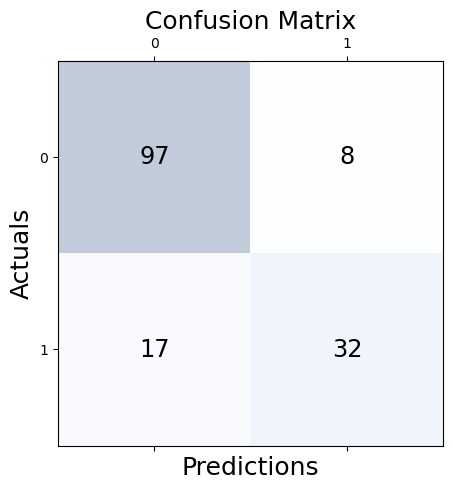

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.25)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.18 %
Standard Deviation: 3.54 %


In [15]:
from sklearn.model_selection import GridSearchCV
parameters = [{"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 74.67 %
Best Parameters: {'C': 10.0, 'penalty': 'l1'}


In [16]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[97  8]
 [17 32]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       105
           1       0.80      0.65      0.72        49

    accuracy                           0.84       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154



In [17]:
# RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [19]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy=", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy= 1.0


In [20]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8051948051948052


In [21]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[93 12]
 [18 31]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.72      0.63      0.67        49

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, predictions)
print(cmr)
accuracy_score(y_test, predictions)

[[93 12]
 [18 31]]


0.8051948051948052

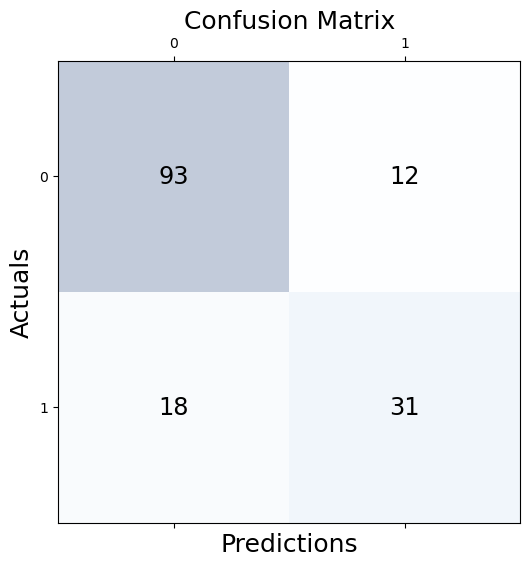

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cmr, cmap=plt.cm.Blues, alpha=0.25)
for i in range(cmr.shape[0]):
    for j in range(cmr.shape[1]):
        ax.text(x=j, y=i,s=cmr[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [24]:
# SVM

In [25]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [26]:
svc_pred = svc_model.predict(X_test)

In [27]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8571428571428571


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[100   5]
 [ 17  32]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       105
           1       0.86      0.65      0.74        49

    accuracy                           0.86       154
   macro avg       0.86      0.80      0.82       154
weighted avg       0.86      0.86      0.85       154



In [29]:
# Neural Networks

In [30]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# Neural network architectuure
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Train model
model.fit(X, y, epochs=150, batch_size=10, validation_split=0.2)

Epoch 1/150
62/62 [==============================] - 1s 8ms/step - loss: 9.5266 - accuracy: 0.4675 - val_loss: 2.1804 - val_accuracy: 0.5844
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 2.3403 - accuracy: 0.5536 - val_loss: 1.6381 - val_accuracy: 0.6558
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 1.7492 - accuracy: 0.5714 - val_loss: 1.3000 - val_accuracy: 0.6429
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 1.3054 - accuracy: 0.6055 - val_loss: 1.0588 - val_accuracy: 0.6558
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 1.0458 - accuracy: 0.6315 - val_loss: 0.9325 - val_accuracy: 0.6623
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.8986 - accuracy: 0.6445 - val_loss: 0.8292 - val_accuracy: 0.6429
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7672 - accuracy: 0.6818 - val_loss: 0.7813 - val_accuracy: 0.6753
Epoch 8/150
6

Epoch 59/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7289 - val_loss: 0.6621 - val_accuracy: 0.6753
Epoch 60/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7321 - val_loss: 0.6259 - val_accuracy: 0.6688
Epoch 61/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7321 - val_loss: 0.6734 - val_accuracy: 0.6623
Epoch 62/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.7419 - val_loss: 0.6287 - val_accuracy: 0.6623
Epoch 63/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7159 - val_loss: 0.6131 - val_accuracy: 0.6948
Epoch 64/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7565 - val_loss: 0.7007 - val_accuracy: 0.6364
Epoch 65/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7451 - val_loss: 0.7073 - val_accuracy: 0.6623
Epoch 

62/62 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7484 - val_loss: 0.7204 - val_accuracy: 0.6623
Epoch 117/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7581 - val_loss: 0.7455 - val_accuracy: 0.6623
Epoch 118/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7581 - val_loss: 0.5858 - val_accuracy: 0.7532
Epoch 119/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7581 - val_loss: 0.5861 - val_accuracy: 0.7013
Epoch 120/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7354 - val_loss: 0.6965 - val_accuracy: 0.6494
Epoch 121/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7532 - val_loss: 0.6512 - val_accuracy: 0.6818
Epoch 122/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7760 - val_loss: 0.5708 - val_accuracy: 0.7403
Epoch 123/150

In [34]:
# Evaluate model on test data
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

25/25 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7623
accuracy: 76.23%


In [35]:
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       105
           1       0.89      0.51      0.65        49

    accuracy                           0.82       154
   macro avg       0.85      0.74      0.77       154
weighted avg       0.84      0.82      0.81       154



In [36]:
# import seaborn as sns
# dataset = pd.read_csv('Diabetes.csv')
# sns.scatterplot(x="Glucose", y="BloodPressure", data=dataset);
# sns.lmplot(x="Glucose", y="BloodPressure", data=dataset);

# import seaborn as sns

# # Select the attribute to plot
# attribute = 'attribute_3'

# # Create a line chart
# sns.lineplot(x='time', y=attribute, data=df)
# plt.xlabel('Time')
# plt.ylabel(attribute)
# plt.show()

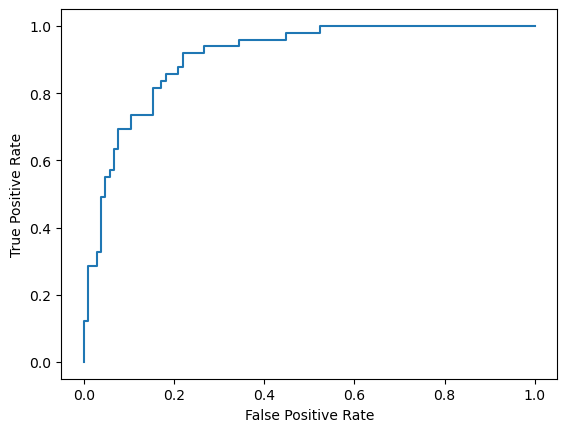

In [37]:
from sklearn import metrics

#defining metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

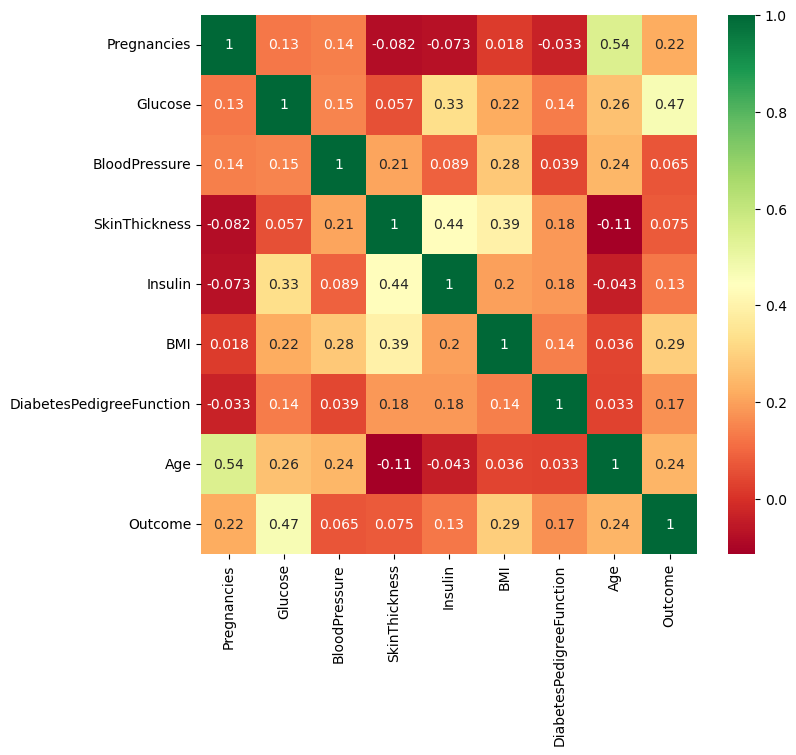

In [38]:
# HEAT MAP

plt.figure(figsize=(8,7))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')

In [39]:
df = pd.read_csv("diabetes.csv")

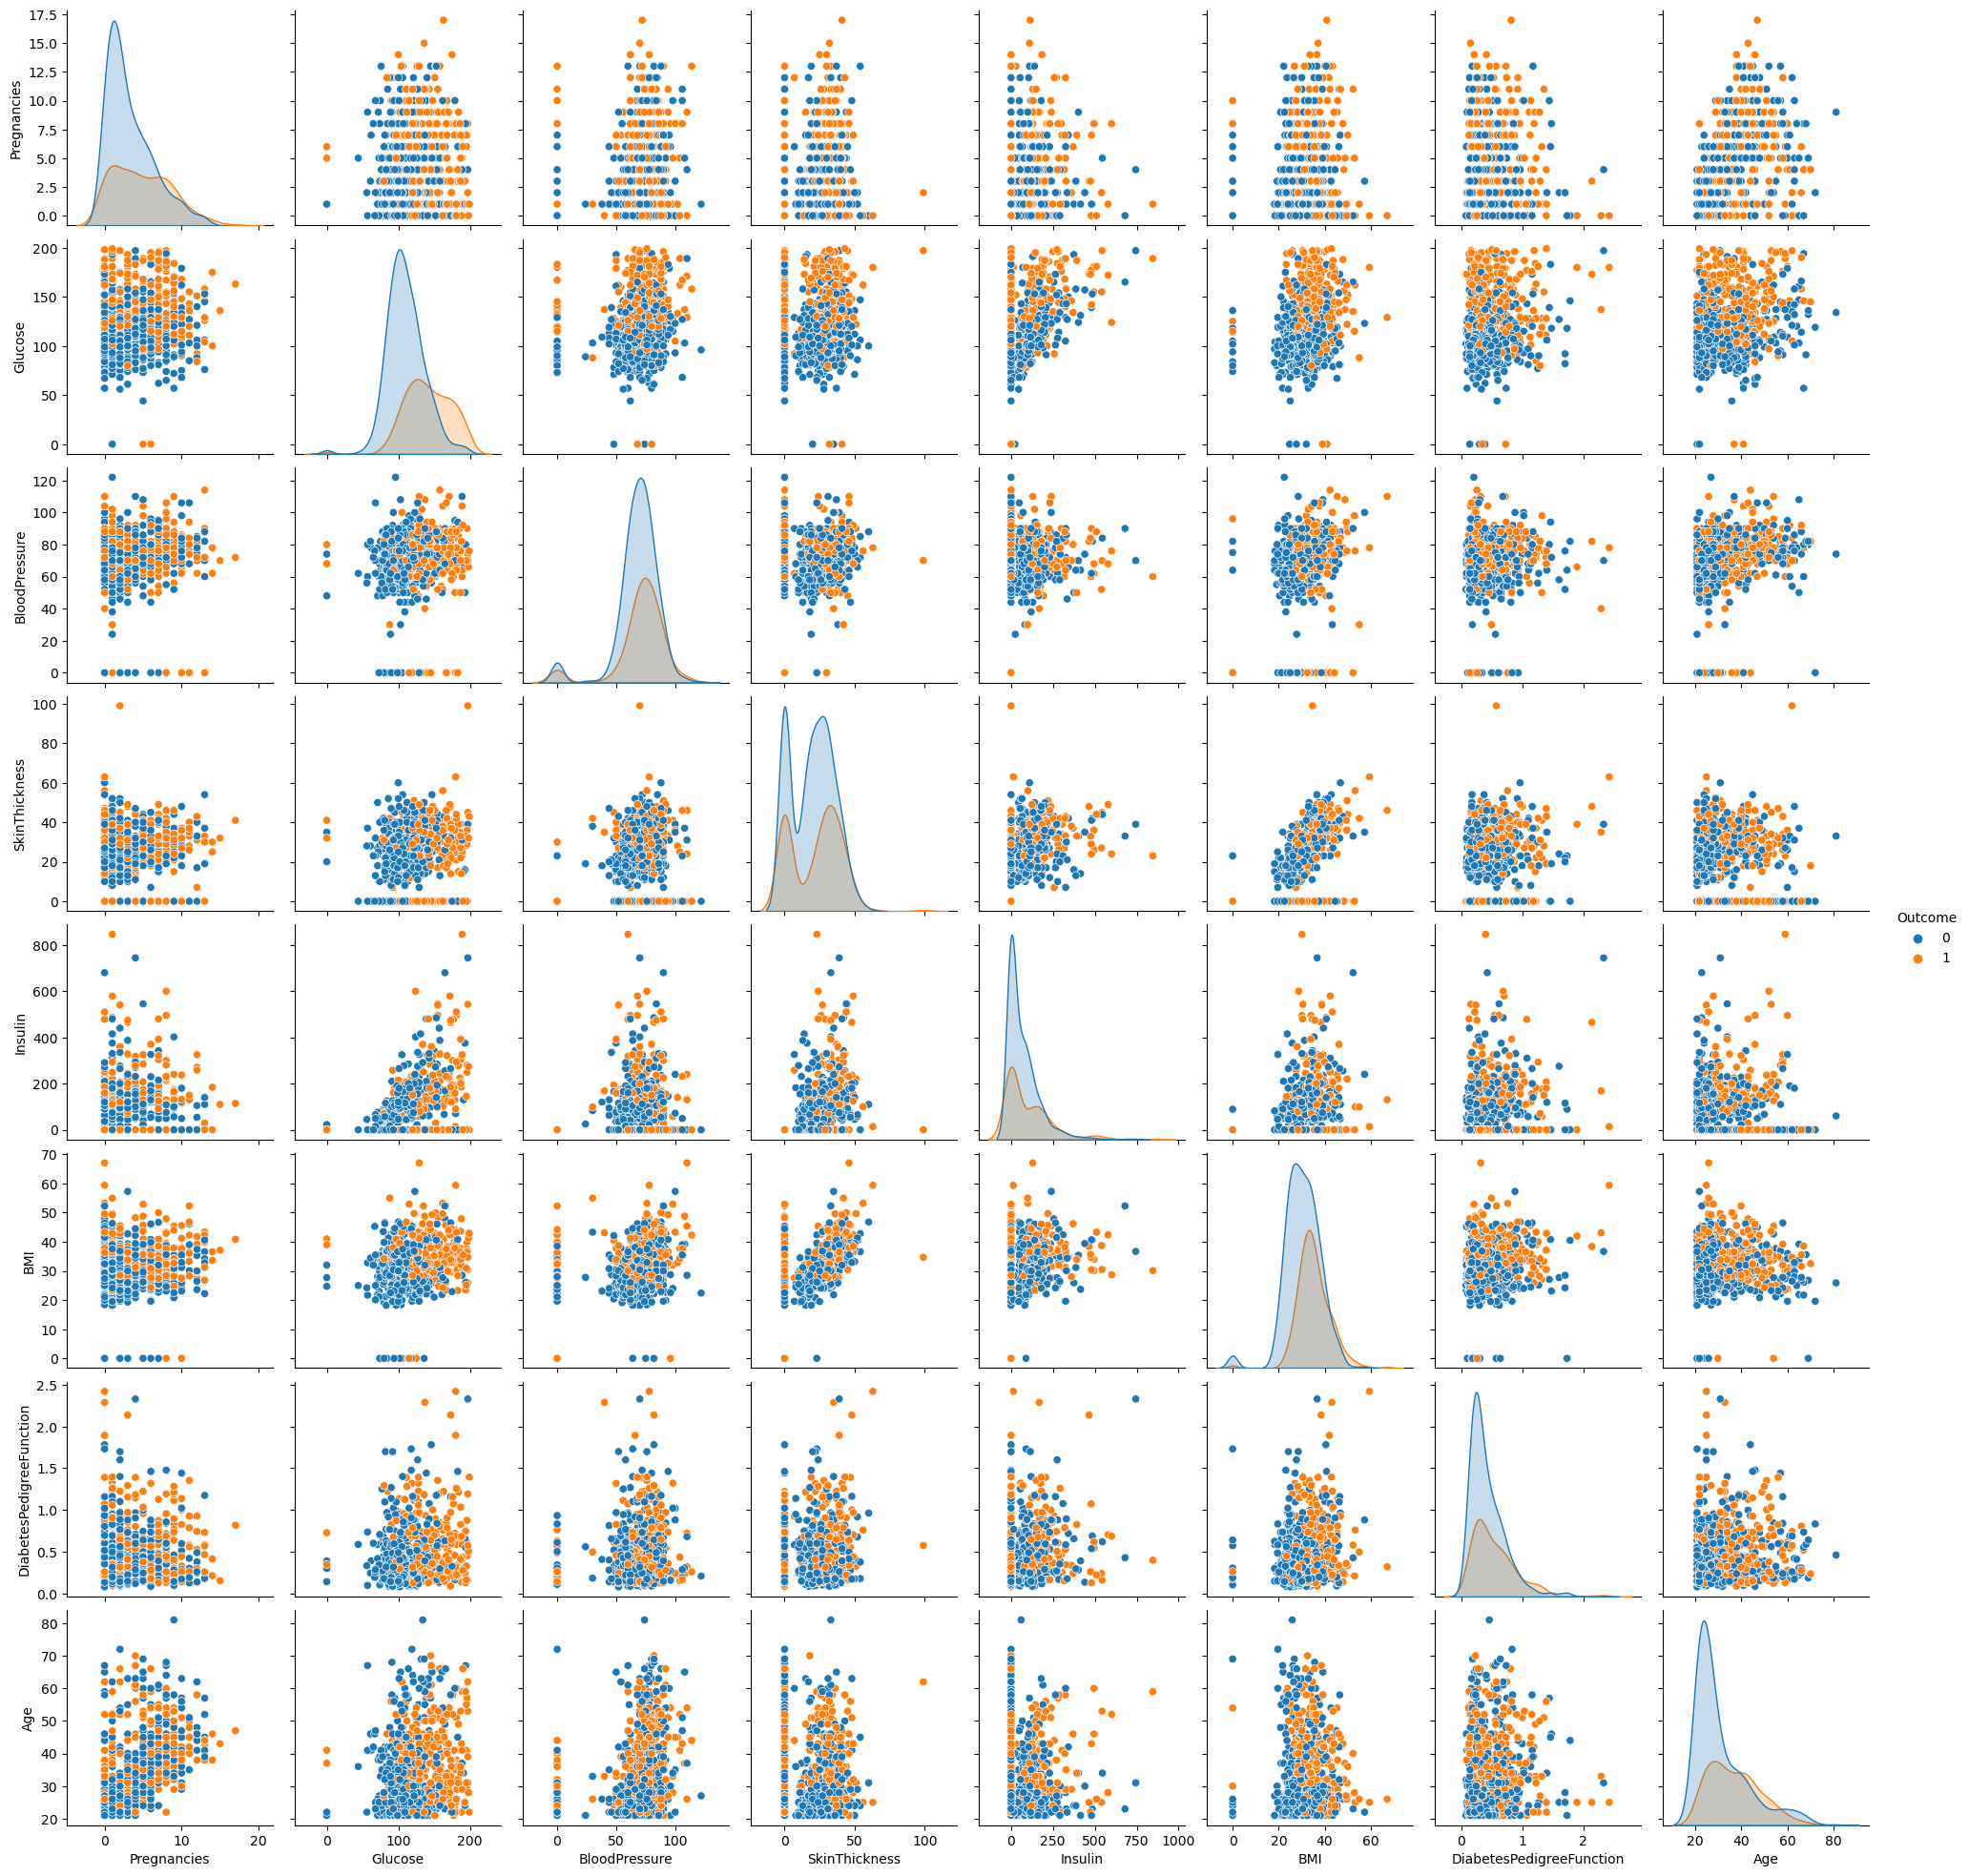

In [40]:
sns.pairplot(df,hue='Outcome')

In [41]:
# Ensemble model (LR+RF+SVM+NN)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Load the data into a pandas DataFrame
dataset = pd.read_csv('Diabetes.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Train the SVM model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Train the NN model
nn = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=0)
nn.fit(X_train, y_train)

# Make predictions on the test data using each of the individual models
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)
nn_pred = nn.predict(X_test)

# Combining the predictions of the three models using a simple average
fpred = np.round((lr_pred + rf_pred + svm_pred + nn_pred) / 4.0).astype(int)

# Calculating the accuracy of the ensemble model
accuracy = accuracy_score(y_test, fpred)

print("Ensemble Model Accuracy: ", accuracy)

Ensemble Model Accuracy:  0.8311688311688312


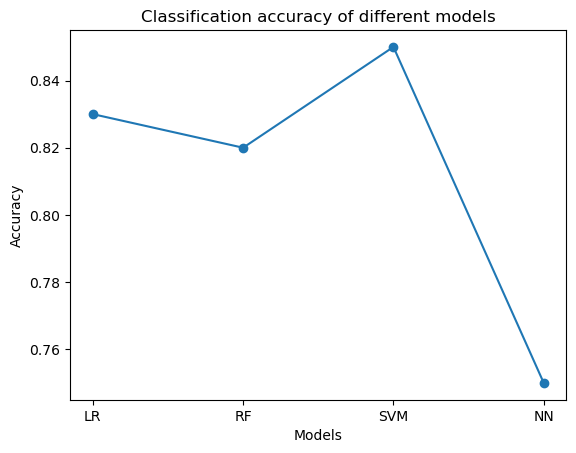

In [43]:
import matplotlib.pyplot as plt

# Example data for classification accuracy
x = ['LR', 'RF', 'SVM', 'NN']
y = [0.83, 0.82, 0.85, 0.75]

plt.plot(x, y, marker='o')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Classification accuracy of different models')

# Show the plot
plt.show()

In [53]:
# Voting - Hard

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = pd.read_csv('Diabetes.csv')
# Assumes the dataset is loaded into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Define the ensemble model using voting
ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svm', svm), ('nn', nn)], voting='hard')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of ensemble model:', accuracy)


Accuracy of ensemble model: 0.7532467532467533


In [54]:
# Stacking

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = pd.read_csv('Diabetes.csv')
# Assumes the dataset is loaded into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Define the ensemble model using stacking
estimators = [('lr', lr), ('rf', rf), ('svm', svm), ('nn', nn)]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the ensemble model on the training data
stack.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stack.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of ensemble model:', accuracy)


Accuracy of ensemble model: 0.7337662337662337


In [55]:
# Boosting

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Load the dataset
dataset = pd.read_csv('Diabetes.csv')
# Assumes the dataset is loaded into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Define the stacking ensemble model
estimators = [('lr', lr), ('rf', rf), ('svm', svm), ('nn', nn)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier, cv=5)

# Fit the stacking ensemble model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_model.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of ensemble model:', accuracy)


Accuracy of ensemble model: 0.7337662337662337


In [56]:
# Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# Load the dataset
dataset = pd.read_csv('Diabetes.csv')
# Assumes the dataset is loaded into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Define the bagging ensemble model
bagging_lr = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=42)
bagging_rf = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)
bagging_svm = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=42)
bagging_nn = BaggingClassifier(base_estimator=nn, n_estimators=10, random_state=42)

# Define the ensemble model using voting
ensemble_model = VotingClassifier(estimators=[
        ('lr', bagging_lr), ('rf', bagging_rf), ('svm', bagging_svm), ('nn', bagging_nn)], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_model.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the ensemble model:', accuracy)


Accuracy of the ensemble model: 0.7532467532467533
